In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)

In [2]:
# grp_dict={
#     'data':'first',
#     'trip_creation_time':'last',
#     'route_schedule_uuid':'first',
#     'route_type':'first',
#     'source_name':'first',
#     'destination_name' :'last',
#     'od_start_time' : 'first',
#     'od_end_time' : 'last',
#     'start_scan_to_end_scan' : 'first',
#     'is_cutoff' : 'first',
#     'cutoff_factor' :'max',
#     'cutoff_timestamp' : 'first',
#     'actual_distance_to_destination':'last',
#     'actual_time' :'max',
#     'osrm_time':'max',
#     'osrm_distance':'max',
#     'factor':'max',
#     'segment_actual_time':'sum',
#     'segment_osrm_time':'sum',
#     'segment_osrm_distance':'sum',
#     'segment_factor':'max'
    
# }

In [3]:
data = pd.read_csv('delhivery_data.csv')

In [4]:
grp_dict={
    'data':'first',
    'trip_creation_time':'last',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'source_name':'first',
    'destination_name' :'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'is_cutoff' : 'first',
    'cutoff_factor' :'max',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination':'last',
    'actual_time' :'sum',
    'osrm_time':'sum',
    'osrm_distance':'sum',
    'factor':'max',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_factor':'max'
    
}

# New DataFrame for Analysis.

In [5]:
new_df = data.groupby(['trip_uuid','source_center','destination_center']).agg(grp_dict).reset_index()

In [6]:
new_df.drop('data',axis=1,inplace=True)

In [7]:
new_df.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,6484.0,3464.0,4540.1261,2.275304,728.0,534.0,670.6205,10.066667
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,9198.0,4323.0,6037.6386,2.862745,820.0,474.0,649.8528,7.333333
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,96.0,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,303.0,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,2601.0,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429


# Check for NULL Values

In [8]:
new_df.isna().sum()

trip_uuid                          0
source_center                      0
destination_center                 0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_name                       66
destination_name                  81
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
is_cutoff                          0
cutoff_factor                      0
cutoff_timestamp                   0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
factor                             0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
segment_factor                     0
dtype: int64

In [9]:
new_df['source_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['source_name']))
new_df['destination_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['destination_name']))

In [10]:
new_df.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# Cleaned data 

In [11]:
#data = pd.read_csv('cleaned_delhivery_data.csv')

In [12]:
data = new_df

In [13]:
source_details = data['source_name'].apply(lambda x : x.split('_'))

In [14]:
destination_details = data['destination_name'].apply(lambda x : x.split('_'))

# Extracting city,place,code from provide feature

In [15]:
def get_features(source_details):
    """
    This Function will extract city,place,code from given feature
    """
    city=[]
    place=[]
    code=[]
    for sname in source_details:
        if(len(sname)==4):
    #         four_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2]+sname[3])
        elif(len(sname)==3):
    #         three_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2])
        elif(len(sname)==2):
    #         two_len.append(sname)
              city.append(sname[0])
              place.append(np.nan)
              code.append(sname[1])
        elif(len(sname)==1):
            city.append(np.nan)
            place.append(np.nan)
            code.append(sname[0])
    return city, place, code


In [16]:
source_city,source_place,source_code = get_features(source_details)

destination_city,destination_place,destination_code = get_features(destination_details)



In [17]:
data['source_city'] = source_city
data['source_place'] = source_place
data['source_code'] = source_code

data['destination_city'] = destination_city
data['destination_place'] = destination_place
data['destination_code'] = destination_code


In [18]:
data

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,6484.0,3464.0,4540.1261,2.275304,728.0,534.0,670.6205,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana)
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,9198.0,4323.0,6037.6386,2.862745,820.0,474.0,649.8528,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh)
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,96.0,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka)
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,303.0,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka)
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,2601.0,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,True,33,2018-10-04 03:17:33,33.627182,119.0,106.0,106.7084,1.243902,49.0,42.0,42.1431,1.384615,Tirchchndr,Shnmgprm,D (Tamil Nadu),Thisayanvilai,UdnkdiRD,D (Tamil Nadu)
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,True,33,2018-10-04 05:32:33,33.673835,173.0,108.0,111.8555,1.875000,89.0,77.0,78.5869,1.363636,Peikulam,SriVnktpm,D (Tamil Nadu),Tirunelveli,VdkkuSrt,I (Tamil Nadu)
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,True,12,2018-10-04 02:05:30,12.661945,51.0,22.0,25.5371,2.625000,29.0,14.0,16.0184,2.625000,Eral,Busstand,D (Tamil Nadu),Tirchchndr,Shnmgprm,D (Tamil Nadu)
26366,tri

In [19]:
dates = data['trip_creation_time'].apply(lambda x: x.split(' ')[0])

In [20]:
df = pd.DataFrame(dates)

In [21]:
dates = df['trip_creation_time'].apply(lambda x: x.split('-'))

In [22]:
year=[]
month=[]
date=[]
for vals in dates:
    year.append(vals[0])
    month.append(vals[1])
    date.append(vals[2])

In [23]:
data['trip_creation_year'] = year
data['trip_creation_month'] = month
data['trip_creation_date'] = date

In [24]:
data['source_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_city']))
data['source_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_place']))
data['destination_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_city']))
data['destination_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_place']))

# Starting Analysis

In [25]:
#data = pd.read_csv('cleaned_delhivery_data.csv')

In [26]:
data.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place           

In [27]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,True,383,2018-09-13 12:40:43,383.759164,6484.0,3464.0,4540.1261,2.275304,728.0,534.0,670.6205,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,09,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,440,2018-09-12 14:56:29,440.973689,9198.0,4323.0,6037.6386,2.862745,820.0,474.0,649.8528,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,True,24,2018-09-12 02:41:24,24.644021,96.0,55.0,60.3157,1.807692,46.0,26.0,28.1995,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,09,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,True,48,2018-09-12 01:39:28,48.542890,303.0,155.0,209.1151,2.285714,95.0,39.0,55.9899,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,True,242,2018-09-14 16:54:36,237.439610,2601.0,1427.0,1975.7409,2.882075,608.0,231.0,317.7408,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,09,12


In [28]:
data.shape

(26368, 32)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       26368 non-null  object 
 1   source_center                   26368 non-null  object 
 2   destination_center              26368 non-null  object 
 3   trip_creation_time              26368 non-null  object 
 4   route_schedule_uuid             26368 non-null  object 
 5   route_type                      26368 non-null  object 
 6   source_name                     26368 non-null  object 
 7   destination_name                26368 non-null  object 
 8   od_start_time                   26368 non-null  object 
 9   od_end_time                     26368 non-null  object 
 10  start_scan_to_end_scan          26368 non-null  float64
 11  is_cutoff                       26368 non-null  bool   
 12  cutoff_factor                   

In [30]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000
mean,298.278671,92.026813,92.425217,2290.618932,1175.002086,1564.546549,2.813548,198.863092,101.681318,125.423680,4.645282
std,440.561588,209.476592,209.415035,11238.249896,5893.392945,7966.272378,3.122130,381.283224,215.650948,285.932556,10.840957
min,20.000000,9.000000,9.001351,9.000000,6.000000,9.072900,0.387755,9.000000,6.000000,9.072900,0.407895
25%,91.000000,21.000000,21.684419,91.000000,47.000000,56.434800,1.728814,50.000000,25.000000,28.471300,2.000000
50%,152.000000,35.000000,35.114228,181.000000,90.000000,100.604350,2.153846,83.000000,42.000000,45.944400,2.727273
75%,307.000000,66.000000,65.750726,450.000000,219.000000,251.385750,2.888889,166.000000,79.000000,91.351975,4.200000
max,7898.000000,1927.000000,1927.447705,167920.000000,76953.000000,102415.868000,77.387097,4504.000000,1938.000000,2640.924700,574.250000


# Univariate Analysis

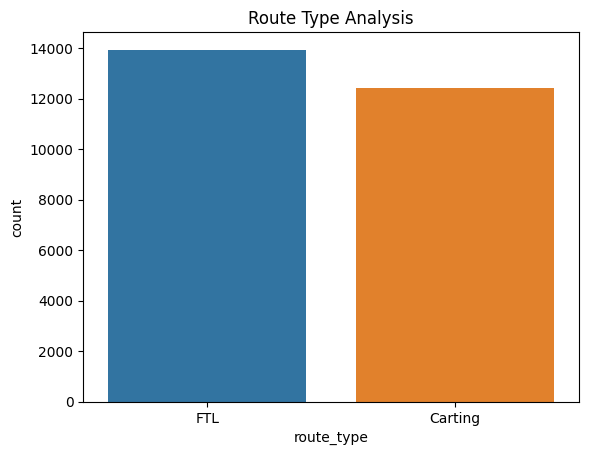

In [31]:
plt.title("Route Type Analysis")
sns.countplot(data=data,x = 'route_type')
plt.show()

In [32]:
def get_quartile_values(data,title):
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3-Q1
    left_wisker = Q1-(1.5)*IQR
    right_wisker = Q3+(1.5)*IQR
    plt.title("Outlier Detection for "+title+" Feature")
    sns.boxplot(data=data,orient='h')
    plt.show()

    return (Q1,Q3,left_wisker,right_wisker)

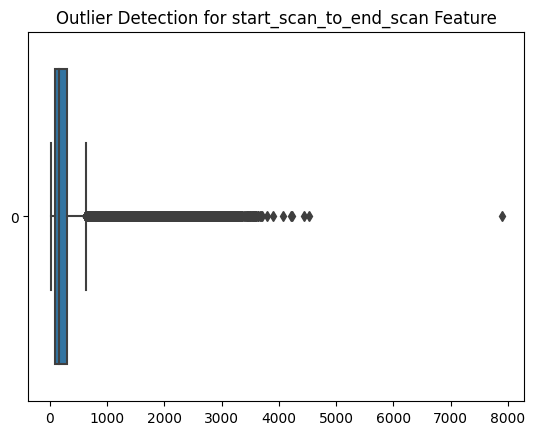

Q1: 91.0,Q3 : 307.0, left_wisker:-233.0,right_wisker:631.0


In [33]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['start_scan_to_end_scan'],'start_scan_to_end_scan')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

# Cleaned start_scan_to_end_scan feature after removing outliers

In [34]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['start_scan_to_end_scan'] = data.loc[(data['start_scan_to_end_scan'] >=leftwisker)&(data['start_scan_to_end_scan'] <=rightwisker)]['start_scan_to_end_scan']
data['start_scan_to_end_scan'] = np.log(data['start_scan_to_end_scan'])

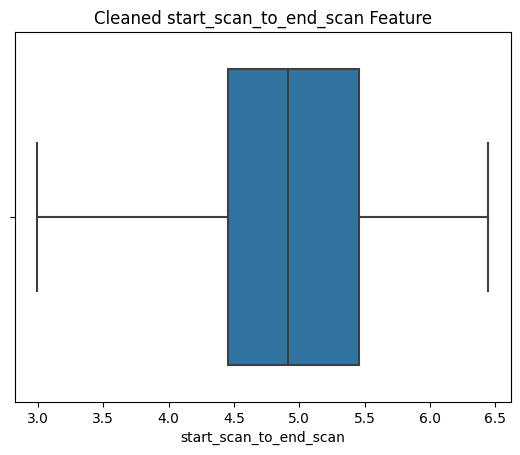

In [35]:
plt.title('Cleaned start_scan_to_end_scan Feature')
sns.boxplot(data=data,x='start_scan_to_end_scan')
plt.show()

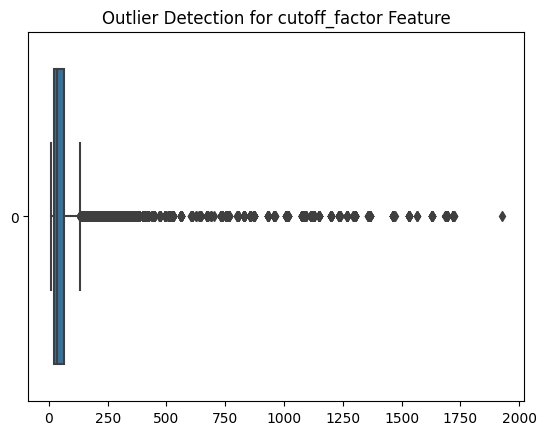

Q1: 21.0,Q3 : 66.0, left_wisker:-46.5,right_wisker:133.5


In [36]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['cutoff_factor'],'cutoff_factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [37]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['cutoff_factor'] = data.loc[(data['cutoff_factor'] >=leftwisker)&(data['cutoff_factor'] <=rightwisker)]['cutoff_factor']
data['cutoff_factor'] = np.log(data['cutoff_factor'])

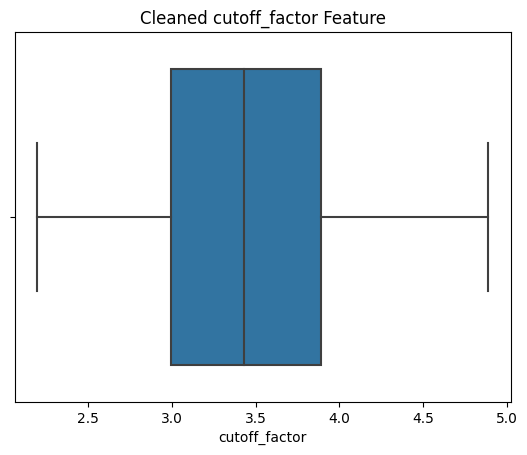

In [38]:
plt.title('Cleaned cutoff_factor Feature')
sns.boxplot(data=data,x='cutoff_factor')
plt.show()

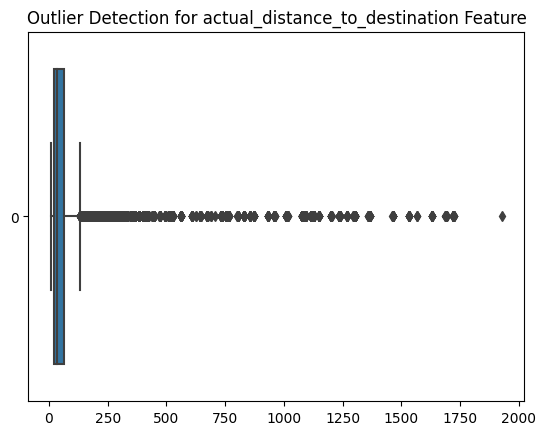

Q1: 21.684418968077466,Q3 : 65.75072642140785, left_wisker:-44.415042211918106,right_wisker:131.85018760140343


In [39]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_distance_to_destination'],'actual_distance_to_destination')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [40]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_distance_to_destination'] = data.loc[(data['actual_distance_to_destination'] >=leftwisker)&(data['actual_distance_to_destination'] <=rightwisker)]['actual_distance_to_destination']
data['actual_distance_to_destination'] = np.log(data['actual_distance_to_destination'])

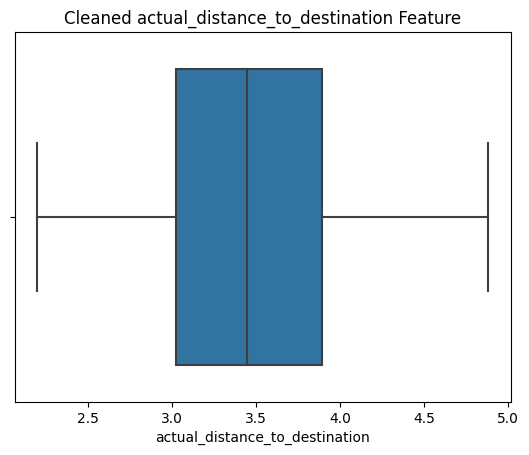

In [41]:
plt.title('Cleaned actual_distance_to_destination Feature')
sns.boxplot(data=data,x='actual_distance_to_destination')
plt.show()

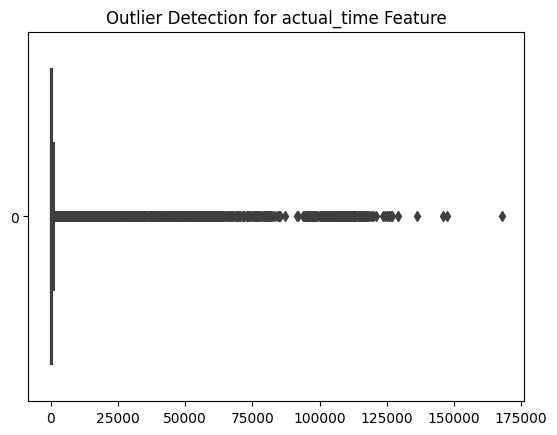

Q1: 91.0,Q3 : 450.0, left_wisker:-447.5,right_wisker:988.5


In [42]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_time'],'actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [43]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_time'] = data.loc[(data['actual_time'] >=leftwisker)&(data['actual_time'] <=rightwisker)]['actual_time']
data['actual_time'] = np.log(data['actual_time'])

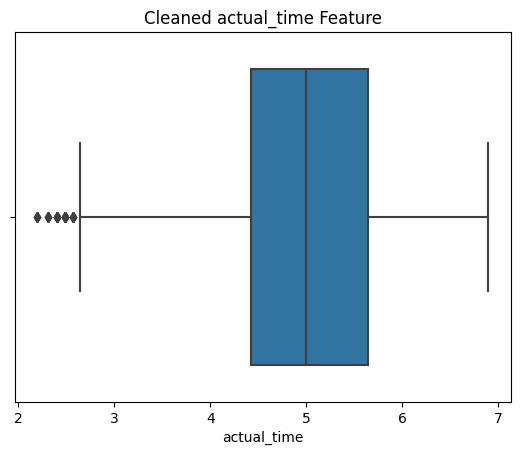

In [44]:
plt.title('Cleaned actual_time Feature')
sns.boxplot(data=data,x='actual_time')
plt.show()

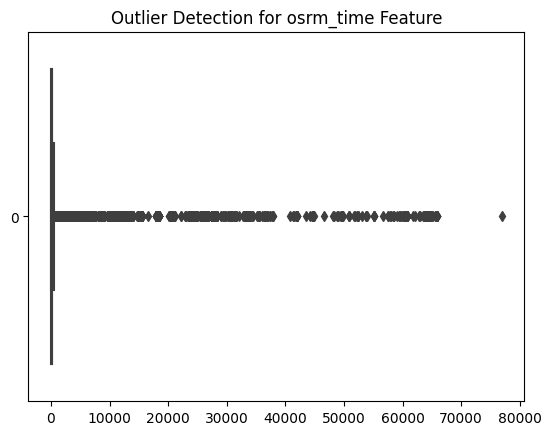

Q1: 47.0,Q3 : 219.0, left_wisker:-211.0,right_wisker:477.0


In [45]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_time'],'osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [46]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_time'] = data.loc[(data['osrm_time'] >=leftwisker)&(data['osrm_time'] <=rightwisker)]['osrm_time']
data['osrm_time'] = np.log(data['osrm_time'])

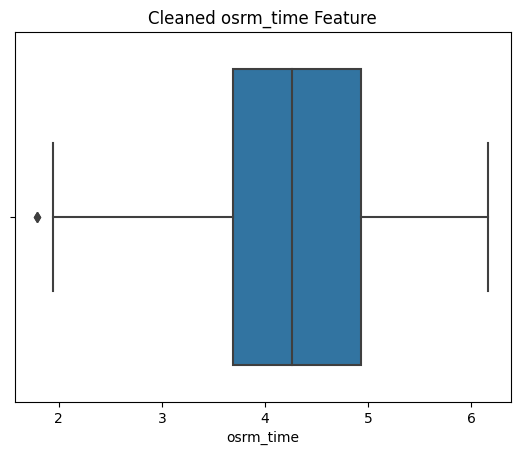

In [47]:
plt.title('Cleaned osrm_time Feature')
sns.boxplot(data=data,x='osrm_time')
plt.show()

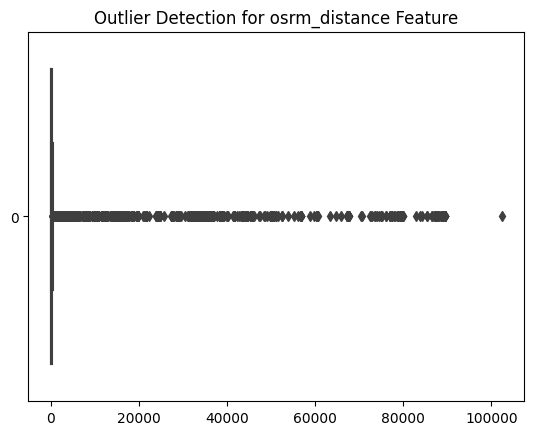

Q1: 56.434799999999996,Q3 : 251.38575, left_wisker:-235.991625,right_wisker:543.812175


In [48]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_distance'],'osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [49]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_distance'] = data.loc[(data['osrm_distance'] >=leftwisker)&(data['osrm_distance'] <=rightwisker)]['osrm_distance']
data['osrm_distance'] = np.log(data['osrm_distance'])

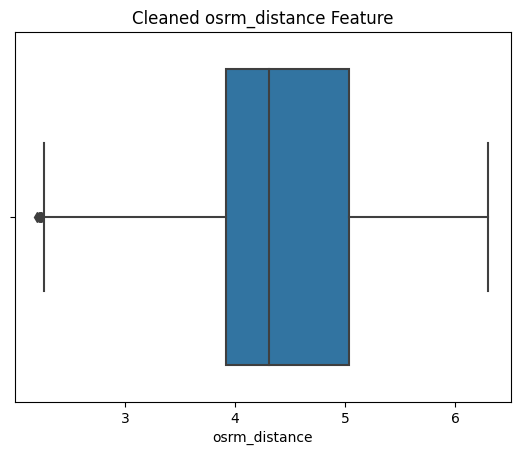

In [50]:
plt.title('Cleaned osrm_distance Feature')
sns.boxplot(data=data,x='osrm_distance')
plt.show()

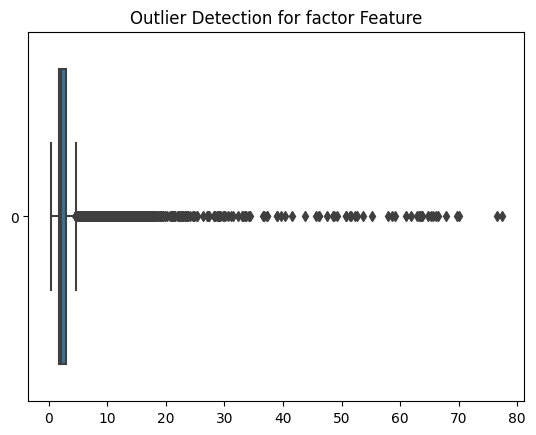

Q1: 1.728813559322034,Q3 : 2.888888888888889, left_wisker:-0.011299435028248483,right_wisker:4.629001883239171


In [51]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['factor'],'factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [52]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['factor'] = data.loc[(data['factor'] >=leftwisker)&(data['factor'] <=rightwisker)]['factor']
data['factor'] = np.log(data['factor'])

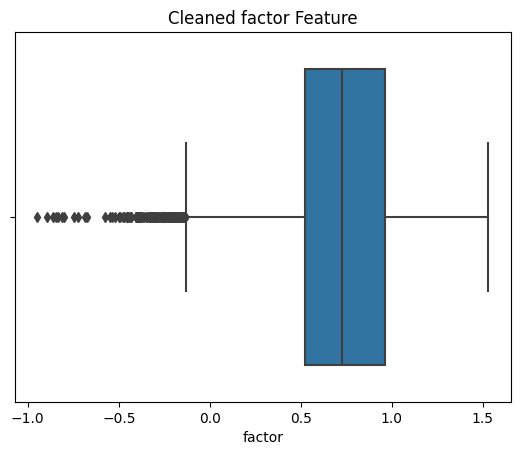

In [53]:
plt.title('Cleaned factor Feature')
sns.boxplot(data=data,x='factor')
plt.show()

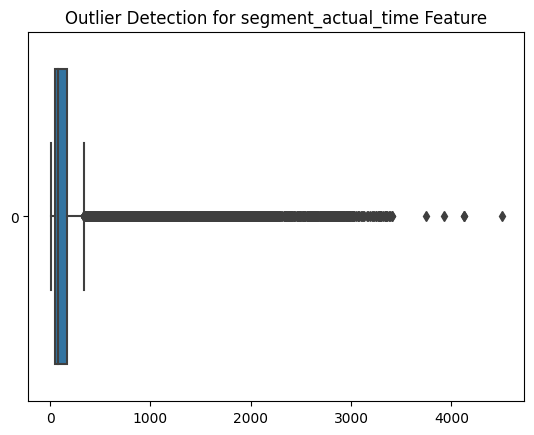

Q1: 50.0,Q3 : 166.0, left_wisker:-124.0,right_wisker:340.0


In [54]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_actual_time'],'segment_actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [55]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_actual_time'] = data.loc[(data['segment_actual_time'] >=leftwisker)&(data['segment_actual_time'] <=rightwisker)]['segment_actual_time']
data['segment_actual_time'] = np.log(data['segment_actual_time'])

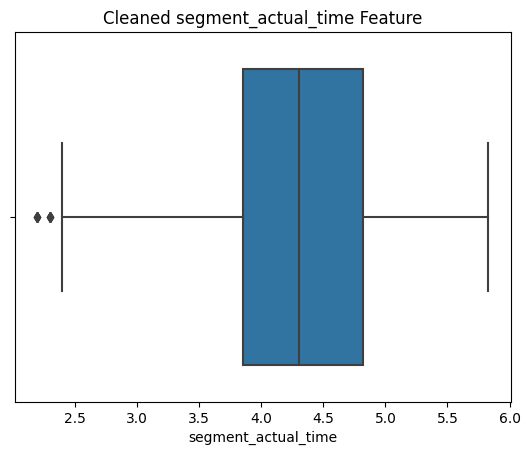

In [56]:
plt.title('Cleaned segment_actual_time Feature')
sns.boxplot(data=data,x='segment_actual_time')
plt.show()

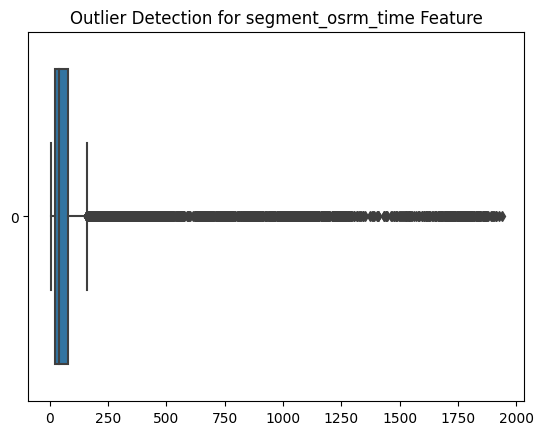

Q1: 25.0,Q3 : 79.0, left_wisker:-56.0,right_wisker:160.0


In [57]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_time'],'segment_osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [58]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_time'] = data.loc[(data['segment_osrm_time'] >=leftwisker)&(data['segment_osrm_time'] <=rightwisker)]['segment_osrm_time']
data['segment_osrm_time'] = np.log(data['segment_osrm_time'])

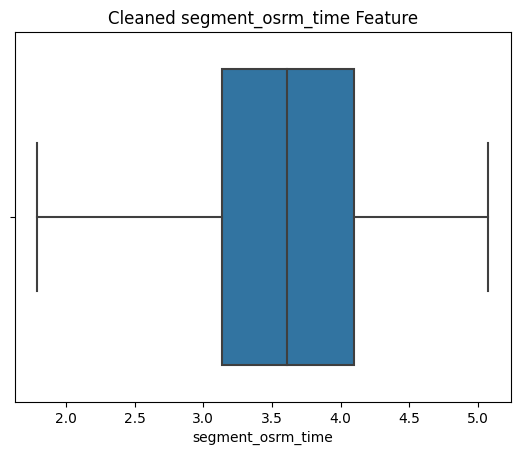

In [59]:
plt.title('Cleaned segment_osrm_time Feature')
sns.boxplot(data=data,x='segment_osrm_time')
plt.show()

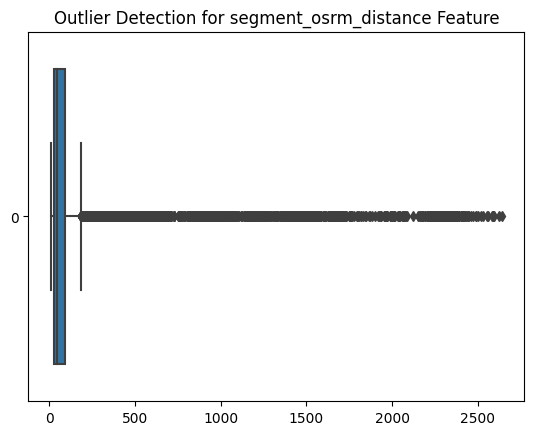

Q1: 28.4713,Q3 : 91.351975, left_wisker:-65.8497125,right_wisker:185.67298749999998


In [60]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_distance'],'segment_osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [61]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_distance'] = data.loc[(data['segment_osrm_distance'] >=leftwisker)&(data['segment_osrm_distance'] <=rightwisker)]['segment_osrm_distance']
data['segment_osrm_distance'] = np.log(data['segment_osrm_distance'])

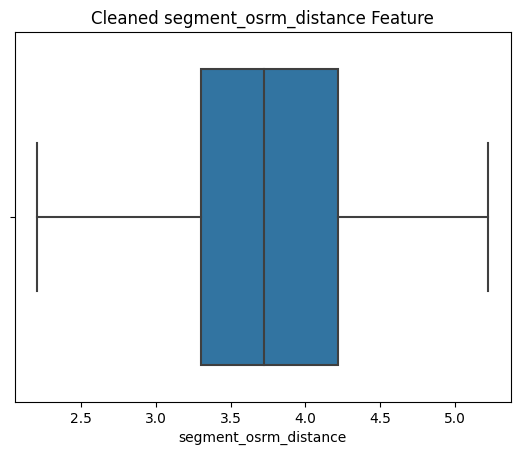

In [62]:
plt.title('Cleaned segment_osrm_distance Feature')
sns.boxplot(data=data,x='segment_osrm_distance')
plt.show()

In [63]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,NaN,True,NaN,2018-09-13 12:40:43,NaN,NaN,NaN,NaN,0.822114,NaN,NaN,NaN,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,09,12
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,NaN,True,NaN,2018-09-12 14:56:29,NaN,NaN,NaN,NaN,1.051781,NaN,NaN,NaN,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,4.564348,4.007333,4.099592,0.592051,3.828641,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,09,12
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,5.713733,5.043425,5.342885,0.826679,4.553877,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,NaN,True,NaN,2018-09-14 16:54:36,NaN,NaN,NaN,NaN,1.058511,NaN,NaN,NaN,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,09,12


# Check for NA Values after removing outliers

In [64]:
data.isna().sum()

trip_uuid                            0
source_center                        0
destination_center                   0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
source_name                          0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan            2721
is_cutoff                            0
cutoff_factor                     3265
cutoff_timestamp                     0
actual_distance_to_destination    3292
actual_time                       3811
osrm_time                         3726
osrm_distance                     3873
factor                            2265
segment_actual_time               3155
segment_osrm_time                 3153
segment_osrm_distance             3106
segment_factor                       0
source_city                          0
source_place                         0
source_code              

In [65]:
data['start_scan_to_end_scan'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['start_scan_to_end_scan']))
data['cutoff_factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['cutoff_factor']))
data['actual_distance_to_destination'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_distance_to_destination']))
data['actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_time']))
data['osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_time']))
data['osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_distance']))
data['factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['factor']))
data['segment_actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_actual_time']))
data['segment_osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_time']))
data['segment_osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_distance']))

In [66]:
data.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place           

In [67]:
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])

# Calculating Time Taken between od_start and od_end_time

In [68]:
data['od_start_end_time_diff'] = (data['od_end_time']-data['od_start_time']).astype('timedelta64[h]')

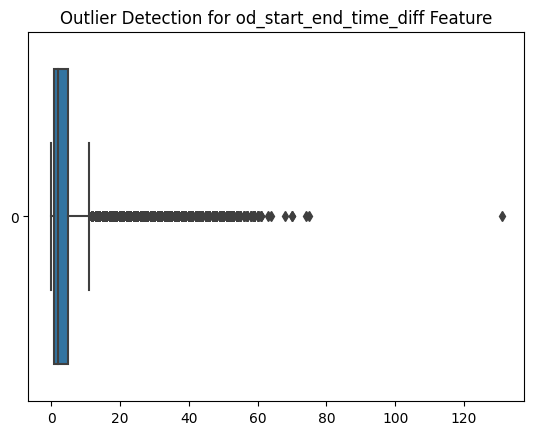

Q1: 1.0,Q3 : 5.0, left_wisker:-5.0,right_wisker:11.0


In [69]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['od_start_end_time_diff'],'od_start_end_time_diff')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [70]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['od_start_end_time_diff'] = data.loc[(data['od_start_end_time_diff'] >=leftwisker)&(data['od_start_end_time_diff'] <=rightwisker)]['od_start_end_time_diff']
#data['od_start_end_time_diff'] = np.log(data['od_start_end_time_diff'])

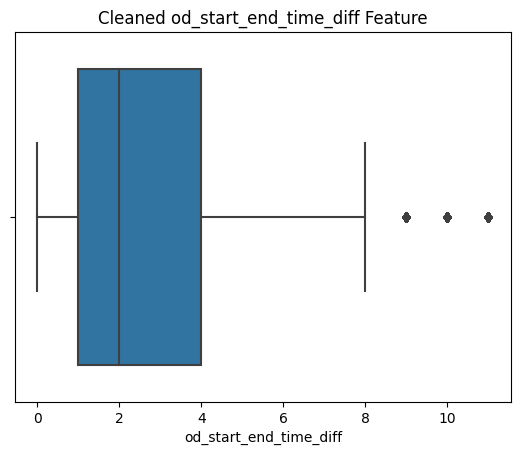

In [71]:
plt.title('Cleaned od_start_end_time_diff Feature')
sns.boxplot(data=data,x='od_start_end_time_diff')
plt.show()

In [72]:
data['od_start_end_time_diff'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['od_start_end_time_diff']))

In [73]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,4.968378,True,3.442997,2018-09-13 12:40:43,3.458508,5.040484,4.319982,4.433802,0.822114,4.340500,3.634931,3.762861,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,2.711191
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,4.968378,True,3.442997,2018-09-12 14:56:29,3.458508,5.040484,4.319982,4.433802,1.051781,4.340500,3.634931,3.762861,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,2.711191
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,4.564348,4.007333,4.099592,0.592051,3.828641,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,09,12,0.000000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,5.713733,5.043425,5.342885,0.826679,4.553877,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,2.000000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,4.968378,True,3.442997,2018-09-14 16:54:36,3.458508,5.040484,4.319982,4.433802,1.058511,4.340500,3.634931,3.762861,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,09,12,2.711191


# Compare the difference between od_start_end_time_diff and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check

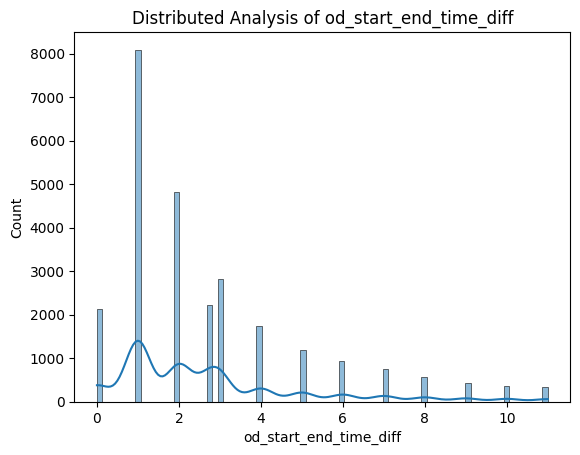

In [74]:
plt.title('Distributed Analysis of od_start_end_time_diff')
sns.histplot(data['od_start_end_time_diff'],kde=True)
plt.show()

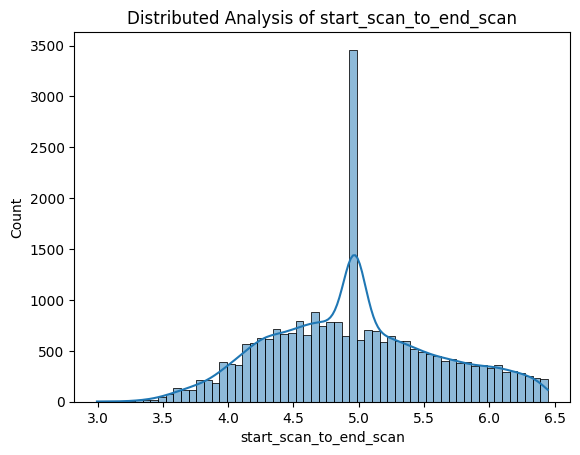

In [75]:
plt.title('Distributed Analysis of start_scan_to_end_scan')
sns.histplot(data['start_scan_to_end_scan'],kde=True)
plt.show()

# Hypothesis testing to check whether od_start_end_time_diff and start_scan_to_end_scan is same or different.

Two Tail t-test

M1 : Mean of od_start_end_time_diff feature.

M2 : Mean of start_scan_to_end_scan feature.
    
H0 : M1=M2

Ha : M1!=M2

In [76]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['od_start_end_time_diff'],data['start_scan_to_end_scan'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.0
Reject NULL Hypothesis


In [77]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,4.968378,True,3.442997,2018-09-13 12:40:43,3.458508,5.040484,4.319982,4.433802,0.822114,4.340500,3.634931,3.762861,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,2.711191
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,4.968378,True,3.442997,2018-09-12 14:56:29,3.458508,5.040484,4.319982,4.433802,1.051781,4.340500,3.634931,3.762861,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,2.711191
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,4.564348,4.007333,4.099592,0.592051,3.828641,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,09,12,0.000000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,5.713733,5.043425,5.342885,0.826679,4.553877,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,2.000000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,4.968378,True,3.442997,2018-09-14 16:54:36,3.458508,5.040484,4.319982,4.433802,1.058511,4.340500,3.634931,3.762861,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,09,12,2.711191


# hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

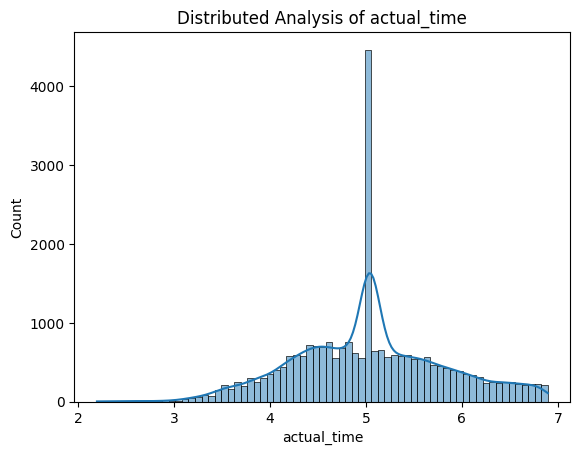

In [78]:
plt.title('Distributed Analysis of actual_time')
sns.histplot(data['actual_time'],kde=True)
plt.show()

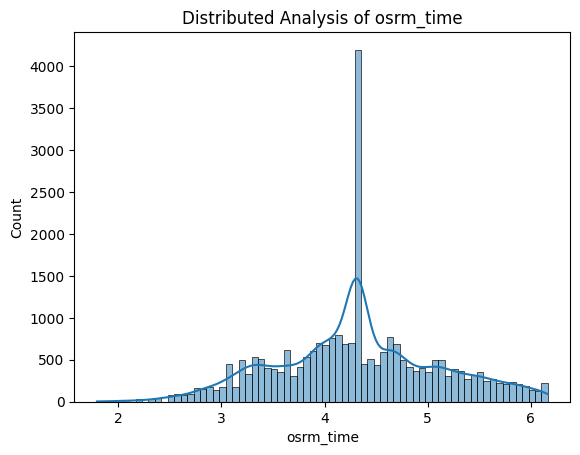

In [79]:
plt.title('Distributed Analysis of osrm_time')
sns.histplot(data['osrm_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of actual_time feature.

M2 : Mean of osrm_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [80]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['osrm_time'],data['actual_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.0
Reject NULL Hypothesis


# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

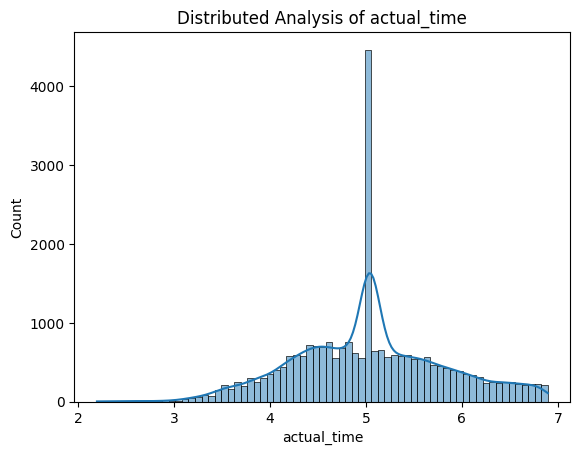

In [81]:
plt.title('Distributed Analysis of actual_time')
sns.histplot(data['actual_time'],kde=True)
plt.show()

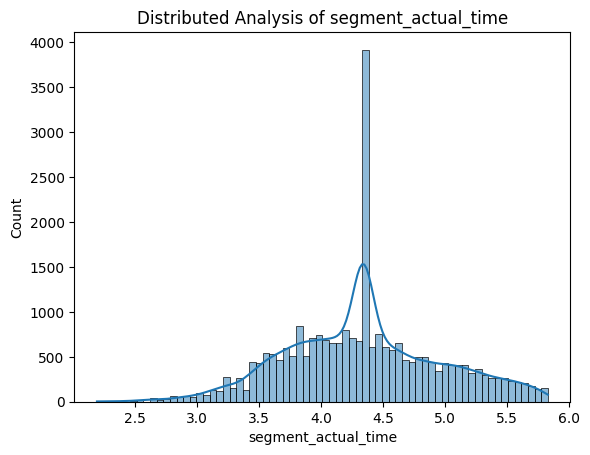

In [82]:
plt.title('Distributed Analysis of segment_actual_time')
sns.histplot(data['segment_actual_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of actual_time feature.

M2 : Mean of segment_actual_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [84]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['actual_time'],data['segment_actual_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.0
Reject NULL Hypothesis


# Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [85]:
data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,4.968378,True,3.442997,2018-09-13 12:40:43,3.458508,5.040484,4.319982,4.433802,0.822114,4.340500,3.634931,3.762861,10.066667,Kanpur,Central,H6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,2.711191
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,4.968378,True,3.442997,2018-09-12 14:56:29,3.458508,5.040484,4.319982,4.433802,1.051781,4.340500,3.634931,3.762861,7.333333,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,2.711191
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,4.060443,True,3.178054,2018-09-12 02:41:24,3.204534,4.564348,4.007333,4.099592,0.592051,3.828641,3.258097,3.339304,2.142857,Doddablpur,ChikaDPP,D (Karnataka),Chikblapur,ShntiSgr,D (Karnataka),2018,09,12,0.000000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,4.804021,True,3.871201,2018-09-12 01:39:28,3.882448,5.713733,5.043425,5.342885,0.826679,4.553877,3.663562,4.025171,6.666667,Tumkur,Veersagr,I (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,2.000000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,4.968378,True,3.442997,2018-09-14 16:54:36,3.458508,5.040484,4.319982,4.433802,1.058511,4.340500,3.634931,3.762861,9.821429,Gurgaon,Bilaspur,HB (Haryana),Chandigarh,Mehmdpur,H (Punjab),2018,09,12,2.711191


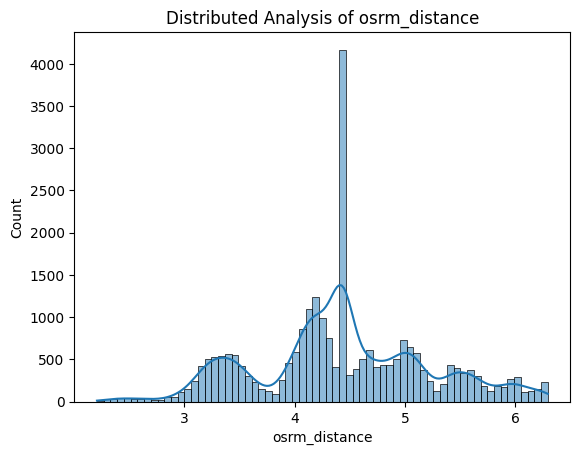

In [91]:
plt.title('Distributed Analysis of osrm_distance')
sns.histplot(data['osrm_distance'],kde=True)
plt.show()

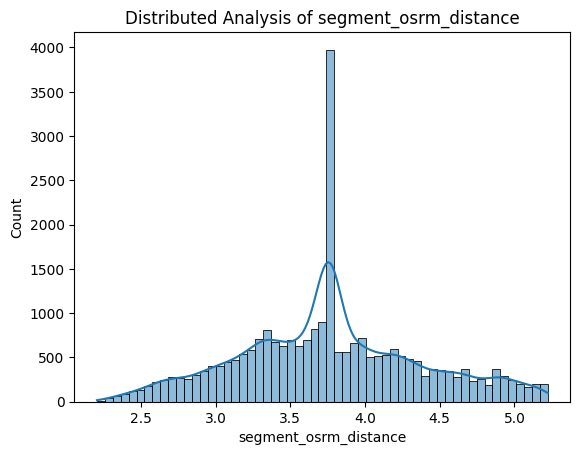

In [87]:
plt.title('Distributed Analysis of segment_osrm_distance')
sns.histplot(data['segment_osrm_distance'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of osrm_distance feature.

M2 : Mean of segment_osrm_distance feature.
    
H0 : M1=M2

Ha : M1!=M2

In [89]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['segment_osrm_distance'],data['osrm_distance'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.0
Reject NULL Hypothesis


# Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

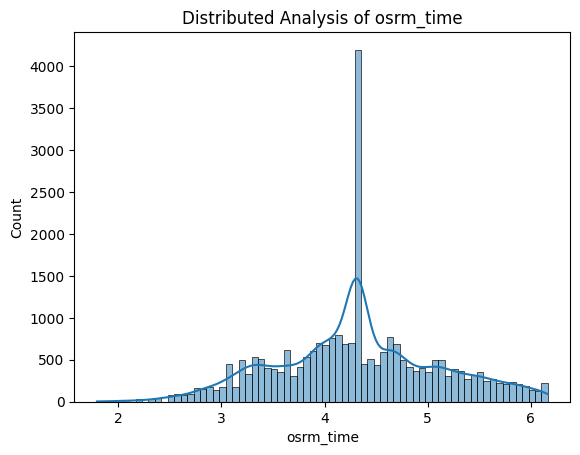

In [92]:
plt.title('Distributed Analysis of osrm_time')
sns.histplot(data['osrm_time'],kde=True)
plt.show()

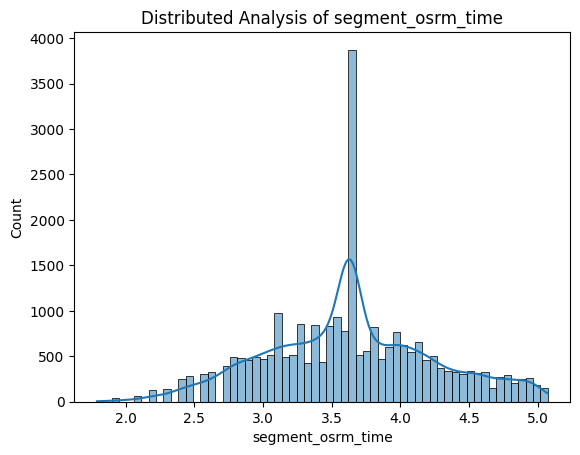

In [93]:
plt.title('Distributed Analysis of segment_osrm_time')
sns.histplot(data['segment_osrm_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of osrm_time feature.

M2 : Mean of segment_osrm_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [94]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['segment_osrm_time'],data['osrm_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.0
Reject NULL Hypothesis
